In [2]:
import pandas as pd
import numpy  as np
from fbprophet import Prophet

In [3]:
# thousands 를 지정하지 않으면 , 00~23시 데이터가 object로  인식됨.
df = pd.read_csv('../../data/ex/ex_tol_202003_04.csv', encoding='cp949', thousands=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 27 columns):
날짜      127 non-null object
영업소     127 non-null object
자료종류    127 non-null object
00시     127 non-null int64
01시     127 non-null int64
02시     127 non-null int64
03시     127 non-null int64
04시     127 non-null int64
05시     127 non-null int64
06시     127 non-null int64
07시     127 non-null int64
08시     127 non-null int64
09시     127 non-null int64
10시     127 non-null int64
11시     127 non-null int64
12시     127 non-null int64
13시     127 non-null int64
14시     127 non-null int64
15시     127 non-null int64
16시     127 non-null int64
17시     127 non-null int64
18시     127 non-null int64
19시     127 non-null int64
20시     127 non-null int64
21시     127 non-null int64
22시     127 non-null int64
23시     127 non-null int64
dtypes: int64(24), object(3)
memory usage: 26.9+ KB


In [4]:
# Data Preprocess
df['TOTAL'] = df.iloc[:,9:11].sum(axis=1)
df.head()

,날짜,영업소,자료종류,00시,01시,02시,03시,04시,05시,06시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,TOTAL
0,2020.03.20,서울,입구,1455,1003,683,715,1015,3436,5861,...,5278,5476,5772,6091,4922,4644,4647,3621,2562,12172
1,2020.03.20,동서울,입구,448,359,324,356,656,2016,3873,...,4287,3992,3679,4060,3266,2793,2040,1355,854,8496
2,2020.03.20,서서울,입구,810,582,463,542,1107,3757,6539,...,5264,5550,5274,5352,5039,4331,3377,2378,1582,13909
3,2020.03.20,군자,입구,406,329,234,256,575,1674,2620,...,2912,3017,2934,2845,2260,1856,1451,1059,765,6353
4,2020.03.21,서울,입구,1975,1299,1043,893,1262,3152,5151,...,5771,5428,5401,4414,3801,3694,3471,3095,1964,10012


In [5]:
dfx = df[['날짜', 'TOTAL']]
dfx.columns = ['ds','y']
dfx.loc[:,'ds'] = pd.to_datetime(dfx.loc[:,'ds'])
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
ds    127 non-null datetime64[ns]
y     127 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
m = Prophet()
m.fit(dfx)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


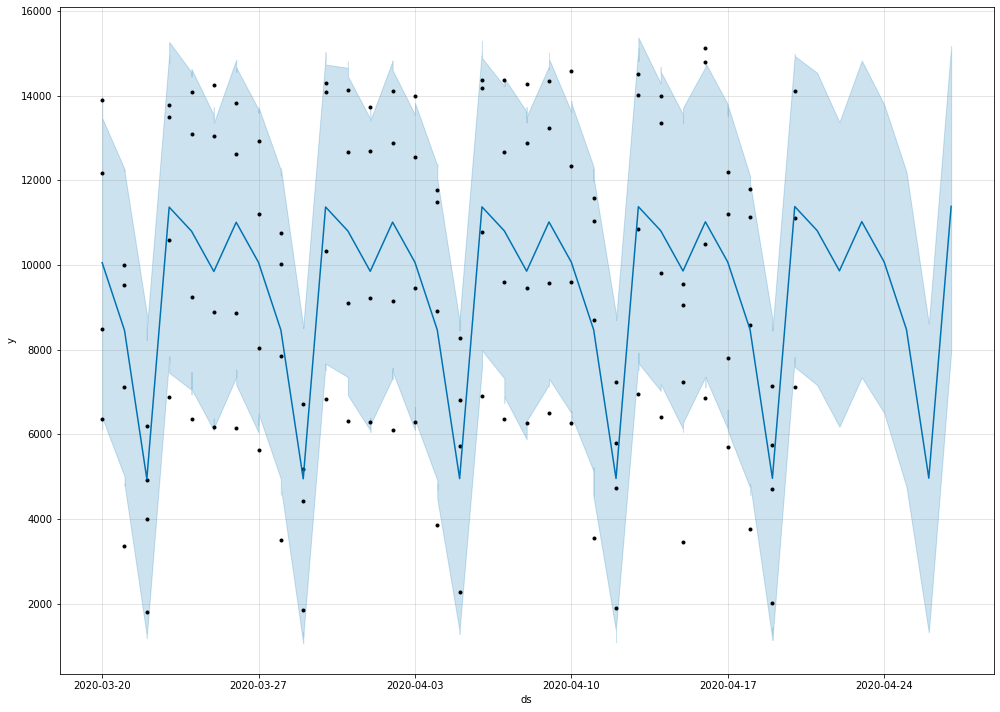

In [7]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast_fig = m.plot(forecast,figsize=(14,10))

- 파란색: 모델이 예측한 값
- 검정색 점: 실제 데이터

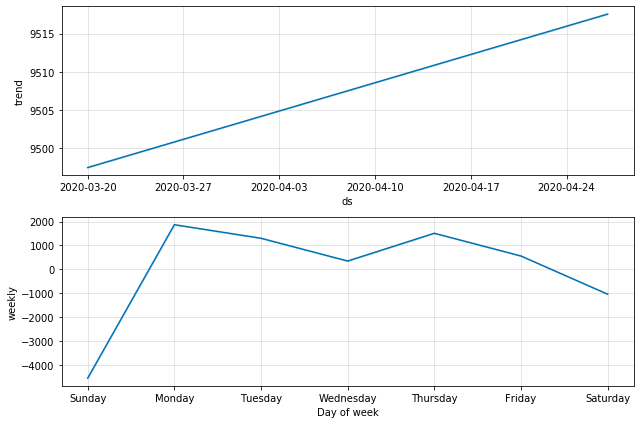

In [8]:
forcast_fig2 = m.plot_components(forecast)

# 지점 교통량 
2020년 03월

In [9]:
# thousands 를 지정하지 않으면 , 00~23시 데이터가 object로  인식됨.
df = pd.read_csv('../../data/ex/VDS_37_02_02_904995.csv', encoding='cp949', thousands=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22483248 entries, 0 to 22483247
Data columns (total 6 columns):
집계일자          int64
집계시분          int64
VDS_ID        object
차로유형구분코드      int64
교통량           int64
Unnamed: 5    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.0+ GB


In [11]:
# Data Preprocess
#df['TOTAL'] = df.iloc[:,4:5].sum(axis=)
#df.head()

In [14]:
import datetime

#dfx.loc[:,'집계일자'] = pd.to_object(dfx.loc[:,'집계일자'])
df.집계일자 = df.집계일자.apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d').date())

In [16]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22483248 entries, 0 to 22483247
Data columns (total 6 columns):
집계일자          object
집계시분          int64
VDS_ID        object
차로유형구분코드      int64
교통량           int64
Unnamed: 5    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ GB


In [17]:
m = Prophet()
m.fit(dfx)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


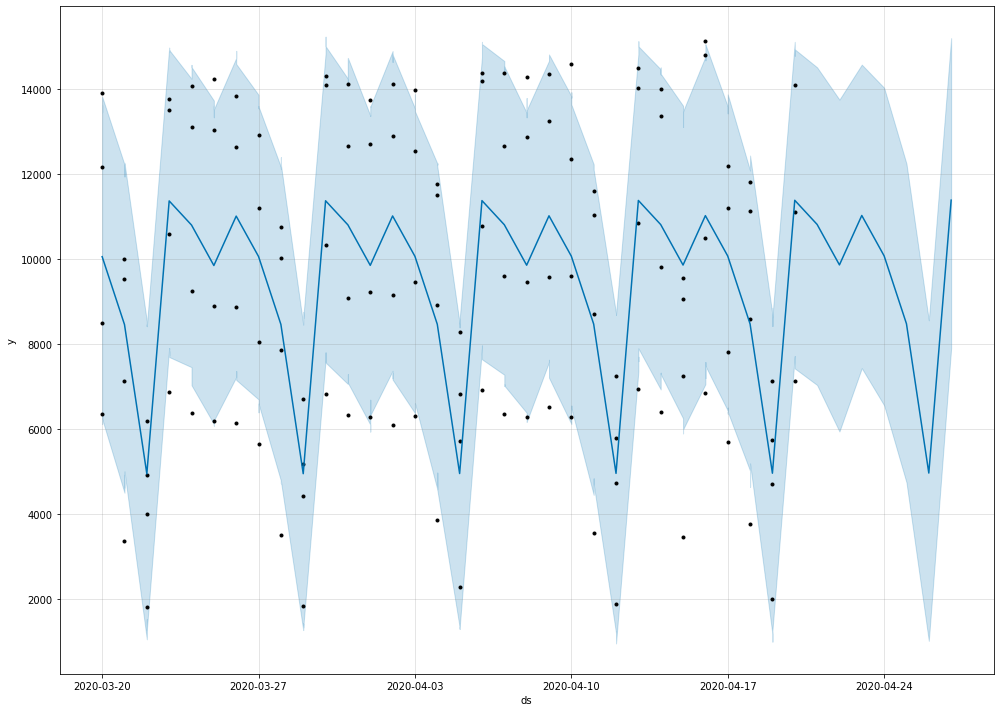

In [23]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast_fig = m.plot(forecast,figsize=(14,10))